In [46]:
### Yvette's Python code ###

## Import packages

import pandas as pd #import Pandas
import matplotlib.pyplot as plt #import visualization package matplotlib 
import seaborn as sns #import visualization package seaborn

## Import the data 
wdiw_file ='WDIW Dataset.xlsx'
wdiw_data = pd.read_excel(wdiw_file)

## Cleaning population data

#1. Extract population data

# Exploratory data on birthrate and population in region East/South Africa: column H, AB, AM, AX, BN, BO
wdiw_pop = wdiw_data[['Country Code','Country Name','Hult Region',
                          'Adolescent fertility rate (births per 1,000 women ages 15-19)', 
                          'Fertility rate, total (births per woman)','Life expectancy at birth, total (years)', 
                          'Population growth (annual %)', 'Urban population (% of total population)', 
                          'Urban population growth (annual %)']]

wdiw_pop_EA = wdiw_pop[wdiw_pop['Hult Region']=='East/South Africa']
wdiw_pop_EA.info(verbose= True )

print(wdiw_pop_EA)

# Print descriptive statistics for feature
print(wdiw_pop_EA.describe())


#2. Missing values

# Count the missing values in the dataset per column
print(wdiw_pop_EA.isnull().sum())

# Flag missing values in region Eastern Africa
for col in wdiw_pop_EA:
    
    if wdiw_pop_EA[col].isnull().astype(int).sum() > 0:
        wdiw_pop_EA['m_'+col] = wdiw_pop_EA[col].isnull().astype(int)

# Slice the sum of the columns where missing values are flagged
print(wdiw_pop_EA.info(null_counts = True,
                    verbose     = False))

# Check for missing values in global dataset
print(wdiw_pop.isnull().sum()) 

# Flag missing values in global dataset
for col in wdiw_pop:
    
    if wdiw_pop[col].isnull().astype(int).sum() > 0:
        wdiw_pop['m_'+col] = wdiw_pop[col].isnull().astype(int)

# Check to see if the flag works
print(wdiw_pop.info(null_counts = True,
                    verbose     = False))

## Population missing values strategy
# Eritrea 
# 'Population growth (annual %)' = 3.31% (WorldBank, 2002)
# 'Urban population (% of total population)', missing
# 'Urban population growth (annual %)', missing    

#  According to the World Bank metadata database, Eritrea's latest household 
#  survey from 2002 and the latest population census is from 1984.
#  The missing values are population census data. 
#  To keep the dataset consistent time-wise, we decide to fill the missing values 
#  with online World Bank data on population in 2002 through external research.
#  Urban population growth data are absent online; we follow the imputing with 
#  mean strategy. 

# Fill in the missing population growth data for Eritrea
wdiw_pop['Population growth (annual %)'] = wdiw_pop['Urban population growth (annual %)'].fillna(0.0331)

# Apply the pandas method fill_na( ) to impute the missing values
urban_pop_mean = wdiw_pop['Urban population (% of total population)'].mean()
urban_pop_growth_mean = wdiw_pop['Urban population growth (annual %)'].mean()
adolescent_fertility = wdiw_pop['Adolescent fertility rate (births per 1,000 women ages 15-19)'].mean()
fertility = wdiw_pop['Fertility rate, total (births per woman)'].mean()
life_expectancy = wdiw_pop['Life expectancy at birth, total (years)'].mean()

# Fill NAs
wdiw_pop['Urban population (% of total population)'] = wdiw_pop['Urban population (% of total population)'].fillna(urban_pop_mean).round(0)
wdiw_pop['Urban population growth (annual %)'] = wdiw_pop['Urban population growth (annual %)'].fillna(urban_pop_growth_mean).round(0)
wdiw_pop['Adolescent fertility rate (births per 1,000 women ages 15-19)'] = wdiw_pop['Adolescent fertility rate (births per 1,000 women ages 15-19)'].fillna(urban_pop_growth_mean).round(0)
wdiw_pop['Fertility rate, total (births per woman)'] = wdiw_pop['Fertility rate, total (births per woman)'].fillna(urban_pop_growth_mean).round(0)
wdiw_pop['Life expectancy at birth, total (years)'] = wdiw_pop['Life expectancy at birth, total (years)'].fillna(urban_pop_growth_mean).round(0)

# Check to make sure NAs are filled in
print(wdiw_pop['Population growth (annual %)'].isnull().any())
print(wdiw_pop['Urban population (% of total population)'].isnull().any())
print(wdiw_pop['Urban population growth (annual %)'].isnull().any())
print(wdiw_pop['Adolescent fertility rate (births per 1,000 women ages 15-19)'].isnull().any())
print(wdiw_pop['Fertility rate, total (births per woman)'].isnull().any())
print(wdiw_pop['Life expectancy at birth, total (years)'].isnull().any())

# Update East Africa missing values
wdiw_pop_EA = wdiw_pop[wdiw_pop['Hult Region']=='East/South Africa']
print(wdiw_pop_EA.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 25 to 216
Data columns (total 9 columns):
Country Code                                                     21 non-null object
Country Name                                                     21 non-null object
Hult Region                                                      21 non-null object
Adolescent fertility rate (births per 1,000 women ages 15-19)    21 non-null float64
Fertility rate, total (births per woman)                         21 non-null float64
Life expectancy at birth, total (years)                          21 non-null float64
Population growth (annual %)                                     20 non-null float64
Urban population (% of total population)                         20 non-null float64
Urban population growth (annual %)                               20 non-null float64
dtypes: float64(6), object(3)
memory usage: 1.6+ KB
    Country Code          Country Name        Hult Region  \
25           BWA     

/Users/yVette_1963/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yVette_1963/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yVette_1963/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

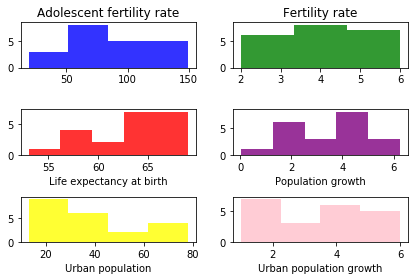

In [47]:
# 3. Visualizing

# Plot East Africa population data in a 3 x 2 grid
plt.subplot(3, 2, 1) # top-left plot
plt.hist(wdiw_pop_EA['Adolescent fertility rate (births per 1,000 women ages 15-19)'],
         bins = 'fd',
         color='blue',
         alpha = 0.8)

plt.title('Adolescent fertility rate')


plt.subplot(3, 2, 2) # top-right plot
plt.hist(wdiw_pop_EA['Fertility rate, total (births per woman)'],
         bins = 'fd',
         color='green',
         alpha = 0.8)

plt.title('Fertility rate')


plt.subplot(3, 2, 3) # mid-left plot
plt.hist(wdiw_pop_EA['Life expectancy at birth, total (years)'],
         bins = 'fd',
         color='red',
         alpha = 0.8)

plt.xlabel('Life expectancy at birth')


plt.subplot(3, 2, 4) # mid-right plot
plt.hist(wdiw_pop_EA['Population growth (annual %)'],
         bins = 5,
         color='purple',
         alpha = 0.8)

plt.xlabel('Population growth')

plt.subplot(3, 2, 5) # lower-left plot
plt.hist(wdiw_pop_EA['Urban population (% of total population)'],
         bins = 'fd',
         color='yellow',
         alpha = 0.8)

plt.xlabel('Urban population')


plt.subplot(3, 2, 6) # lower-right plot
plt.hist(wdiw_pop_EA['Urban population growth (annual %)'],
         bins = 'fd',
         color='pink',
         alpha = 0.8)

plt.xlabel('Urban population growth')

# Display the results
plt.tight_layout()
plt.show()

plt.savefig('EA Population histogran.png')

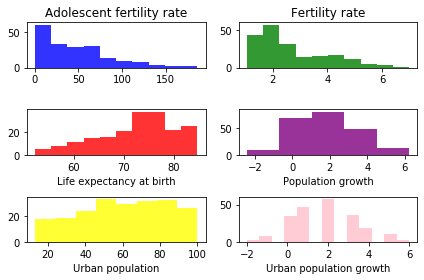

In [53]:
# Plot global population data in a 3 x 2 grid
plt.subplot(3, 2, 1) # top-left plot
plt.hist(wdiw_pop['Adolescent fertility rate (births per 1,000 women ages 15-19)'],
         bins = 'fd',
         color='blue',
         alpha = 0.8)

plt.title('Adolescent fertility rate')


plt.subplot(3, 2, 2) # top-right plot
plt.hist(wdiw_pop['Fertility rate, total (births per woman)'],
         bins = 'fd',
         color='green',
         alpha = 0.8)

plt.title('Fertility rate')


plt.subplot(3, 2, 3) # mid-left plot
plt.hist(wdiw_pop['Life expectancy at birth, total (years)'],
         bins = 'fd',
         color='red',
         alpha = 0.8)

plt.xlabel('Life expectancy at birth')


plt.subplot(3, 2, 4) # mid-right plot
plt.hist(wdiw_pop['Population growth (annual %)'],
         bins = 5,
         color='purple',
         alpha = 0.8)

plt.xlabel('Population growth')

plt.subplot(3, 2, 5) # lower-left plot
plt.hist(wdiw_pop['Urban population (% of total population)'],
         bins = 'fd',
         color='yellow',
         alpha = 0.8)

plt.xlabel('Urban population')


plt.subplot(3, 2, 6) # lower-right plot
plt.hist(wdiw_pop['Urban population growth (annual %)'],
         bins = 'fd',
         color='pink',
         alpha = 0.8)

plt.xlabel('Urban population growth')

# Display the results
plt.tight_layout()
plt.show()

plt.savefig('Global Population histogran.png')

                                                    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Adolescent fertility rate (births per 1,000 wom...                                               1.00               
Fertility rate, total (births per woman)                                                         0.80               
Life expectancy at birth, total (years)                                                         -0.78               
Population growth (annual %)                                                                     0.59               
Urban population (% of total population)                                                        -0.44               
Urban population growth (annual %)                                                               0.57               

                                                    Fertility rate, total (births per woman)  \
Adolescent fertility rate (births per 1,000 wom...                                  

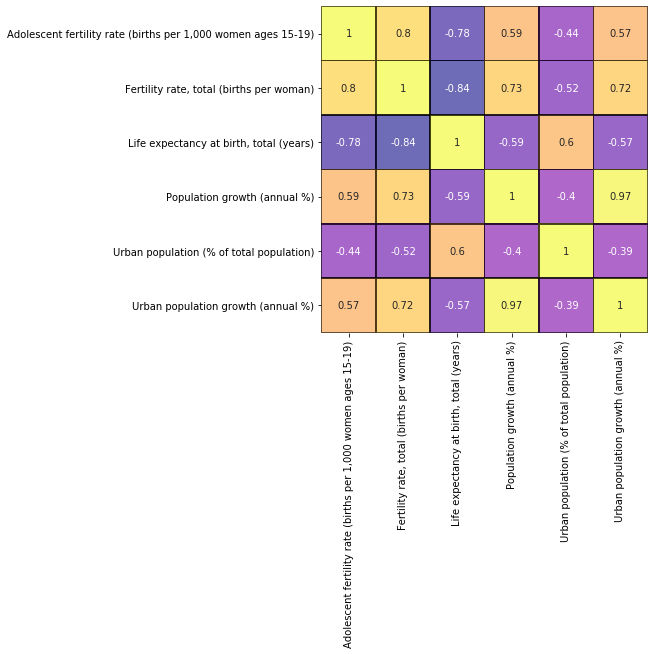

In [61]:
# 4. Data analysis on population and fertility

#Discover correlations using heatmap
# Create a correlation matrix
wdiw_pop_corr = wdiw_pop[['Country Code','Country Name','Hult Region',
                          'Adolescent fertility rate (births per 1,000 women ages 15-19)', 
                          'Fertility rate, total (births per woman)','Life expectancy at birth, total (years)', 
                          'Population growth (annual %)', 'Urban population (% of total population)', 
                          'Urban population growth (annual %)']].corr().round(2)

# Print the correlation matrix
print(wdiw_pop_corr)

# Send wdiw_pop_corr to Excel
# df_corr.to_excel("wdiw_pop_corr_matrix.xlsx")

# Focus on correlations with the target variable - population
wdiw_pop_corr.loc['Population growth (annual %)'].sort_values(ascending = False)

# Use heatmap from seaborn to create a visual correlation matrix
import seaborn as sns           

# Declare plot size
fig, ax = plt.subplots(figsize=(6,6))

# Create the heatmap
sns.heatmap(data       = wdiw_pop_corr,
            cmap       = 'plasma',
            square     = True,
            annot      = True,
            linecolor  = 'black',
            linewidths = 0.5,
            cbar = False,
            alpha = 0.6)

# Save the figure and display the plot

# Reconfigure the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# Display
plt.show()

plt.savefig('Population correlation heatmap.png')

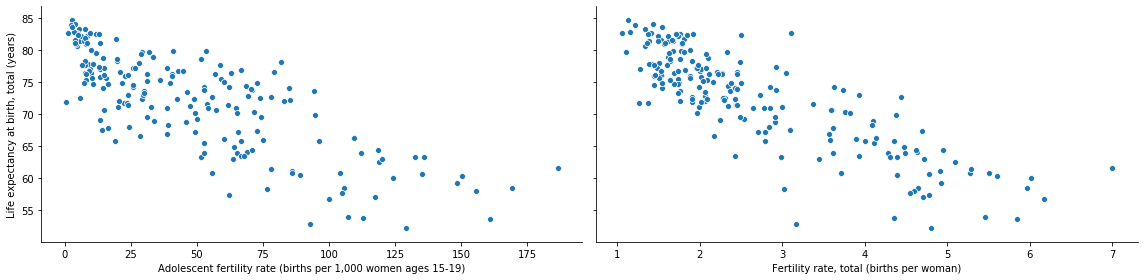

In [86]:
# Visualize relationships using pairplot

# Filter to focus on each relationship between fertility and life expentancy
sns.pairplot(data = wdiw_pop[['Country Code','Country Name','Hult Region',
                          'Adolescent fertility rate (births per 1,000 women ages 15-19)', 
                          'Fertility rate, total (births per woman)','Life expectancy at birth, total (years)']],
             x_vars = ['Adolescent fertility rate (births per 1,000 women ages 15-19)', 
                        'Fertility rate, total (births per woman)'],
             y_vars = ['Life expectancy at birth, total (years)'],
             height = 4, aspect = 2)

# Format options and display
plt.tight_layout()
plt.show()

plt.savefig('Fertility life expectancy relationship.png')